# Environment Setup

**Check House Price Data file**

In [346]:
ls houseprices_full

best_mlp_1.h5*                      test.csv*
best_mlp_2.h5*                      train.csv*
best_mlp_3.h5*                      train_proc.csv
best_mlp_4.h5*                      train_proc_lg.csv
best_models_1_scaled/               validation_proc.csv
best_models_2_scaled/               validation_proc_lg.csv
houseprices_full_best_models_3.zip


In [347]:
!pip freeze

absl-py==0.2.0
alabaster==0.7.10
anaconda-client==1.6.9
anaconda-navigator==1.7.0
anaconda-project==0.8.2
appnope==0.1.0
appscript==1.0.1
asn1crypto==0.24.0
astor==0.6.2
astroid==1.6.1
astropy==2.0.3
attrs==17.4.0
Babel==2.5.3
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==1.5.0
bokeh==0.12.13
boto==2.48.0
Bottleneck==1.2.1
certifi==2018.1.18
cffi==1.11.4
chardet==3.0.4
click==6.7
cloudpickle==0.5.2
clyent==1.2.2
colorama==0.3.9
conda==4.4.10
conda-build==3.4.1
conda-verify==2.0.0
contextlib2==0.5.5
cryptography==2.1.4
cycler==0.10.0
Cython==0.27.3
cytoolz==0.9.0
dask==0.16.1
datashape==0.5.4
decorator==4.2.1
distributed==1.20.2
docutils==0.14
entrypoints==0.2.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==2.0.13
Flask==0.12.2
Flask-Cors==3.0.3
future==0.16.0
gast==0.2.0
gevent==1.2.2
glob2==0.6
gmpy2==2.0.8
graphviz==0.5.1
greenlet==0.4.12
grpcio==1.11.0
h5py==2.7.1
heapdict==1.0.0
html5lib==0.9999999
idna==2.6
image

# Project Setup

In [348]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

from scipy import stats
from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy.stats import norm

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import keras
from keras.models import Sequential
from keras.layers import Average, Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Input
from keras.callbacks import EarlyStopping

# Data Preprocessing

## Raw data analysis

### Declarations

In [349]:
def load_data():
  data_train = pd.read_csv('houseprices_full/train.csv')
  data_test = pd.read_csv('houseprices_full/test.csv')
  all_data = pd.concat((data_train.loc[:,'MSSubClass':'SaleCondition'],
                      data_test.loc[:,'MSSubClass':'SaleCondition']))
  all_result = pd.concat((data_train.loc[:, 'SalePrice'],
                         data_test.loc[:, 'SalePrice']))
  return (data_train, data_test, all_data, all_result)

In [350]:
def export_lg_data():
    combined_data = pd.concat((data_train.loc[:,'MSSubClass':'SaleCondition'],
                      data_test.loc[:,'MSSubClass':'SaleCondition']))
    combined_result = pd.concat((data_train.loc[:, 'SalePrice'],
                         data_test.loc[:, 'SalePrice']))
    
    data_tr, data_val, result_tr, result_val = train_test_split(combined_data, combined_result, random_state = 3)
    data_tr=pd.concat([data_tr, np.log1p(result_tr)], axis=1)
    data_tr.to_csv('houseprices_full/train_proc_lg.csv', sep=',')

    data_val=pd.concat([data_val, np.log1p(result_val)], axis=1)
    data_tr.to_csv('houseprices_full/validation_proc_lg.csv', sep=',')

In [351]:
#export_lg_data()

### Flow

In [352]:
data_train, data_test, all_data, all_result = load_data()
print(data_train.axes)
print(data_test.axes)

[RangeIndex(start=0, stop=1460, step=1), Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Gara

In [353]:
print(data_train.shape)
print(data_test.shape)

(1460, 81)
(1459, 81)


In [354]:
print(data_train['MSSubClass'].describe())
print(data_train['MSSubClass'].unique())

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2f70e470>,
      dtype=object)

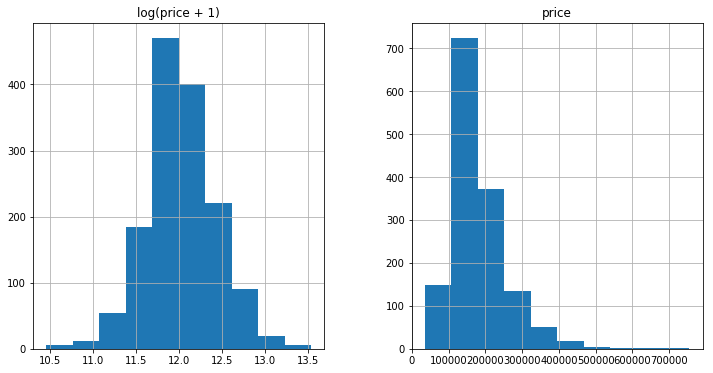

In [355]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":data_train["SalePrice"], "log(price + 1)":np.log1p(data_train["SalePrice"])})
prices.hist()

## Impute data

### Declarations

In [356]:
def check_data_missing_ratio(all_data):
  all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
  all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
  print(missing_data.head())

In [357]:
def fill_na_simple(all_data):
  all_data = pd.get_dummies(all_data)
  all_data = all_data.fillna(all_data.mean())
  return all_data

In [358]:
def fill_na_data_by_type(all_data):
  all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
  all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
  all_data["Alley"] = all_data["Alley"].fillna("None")
  all_data["Fence"] = all_data["Fence"].fillna("None")
  all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
  all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
  for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
      all_data[col] = all_data[col].fillna('None')
  for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
      all_data[col] = all_data[col].fillna(0)
  for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
      all_data[col] = all_data[col].fillna(0)
  for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
      all_data[col] = all_data[col].fillna('None')
  all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
  all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
  all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
  all_data = all_data.drop(['Utilities'], axis=1)
  all_data["Functional"] = all_data["Functional"].fillna("Typ")
  all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
  all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
  all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
  all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
  all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
  all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [359]:
def mark_col_categorical(all_data):
  #MSSubClass =The building class
  all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

  #Changing OverallCond into a categorical variable
  all_data['OverallCond'] = all_data['OverallCond'].astype(str)

  #Year and month sold are transformed into categorical features.
  all_data['YrSold'] = all_data['YrSold'].astype(str)
  all_data['MoSold'] = all_data['MoSold'].astype(str)

In [360]:
def label_cat_features(all_data):
  from sklearn.preprocessing import LabelEncoder
  cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
          'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
          'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
          'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
          'YrSold', 'MoSold')
  # Process columns and apply LabelEncoder to categorical features
  for c in cols:
      lbl = LabelEncoder() 
      lbl.fit(list(all_data[c].values)) 
      all_data[c] = lbl.transform(list(all_data[c].values))

In [361]:
def create_compound_feature(all_data):
  # Adding Total Square Feet feature 
  all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [362]:
def check_skewness(all_data):
  numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

  # Check the skew of all numerical features
  skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
  skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
  print(skewness.head())

In [363]:
def skew_data_set(all_data, normal_skew):
  numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

  # Check the skew of all numerical features
  skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
  skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
  
  # Only perform BC transformation on data set having large skewness
  skewness = skewness[abs(skewness) > normal_skew]
  print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

  from scipy.special import boxcox1p
  skewed_features = skewness.index
  lam = 0.15
  for feat in skewed_features:
      all_data[feat] = boxcox1p(all_data[feat], lam)
      all_data[feat] += 1

In [364]:
def plot_distribution(data_train):
  #Check the new distribution 
  sns.distplot(data_train['SalePrice'] , fit=norm);

  # Get the fitted parameters used by the function
  (mu, sigma) = norm.fit(data_train['SalePrice'])
  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
              loc='best')
  plt.ylabel('Frequency')
  plt.title('SalePrice distribution')

  fig = plt.figure()
  res = stats.probplot(data_train['SalePrice'], plot=plt)
  plt.show()

  print("Skewness: %f" % data_train['SalePrice'].skew())
  print("Kurtosis: %f" % data_train['SalePrice'].kurt())

### Flow

In [365]:
simple_fill=True

print("===Before filling===")
check_data_missing_ratio(all_data)

if(simple_fill):
  all_data=fill_na_simple(all_data)
else:
  fill_na_data_by_type(all_data)

print("\n===After filling===")
check_data_missing_ratio(all_data)

===Before filling===
             Missing Ratio
PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
FireplaceQu      48.646797

===After filling===
Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [366]:
print(all_data['MSSubClass'].describe())
print(all_data['MSSubClass'].unique())

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]


In [367]:
if(not simple_fill):
  mark_col_categorical(all_data)
  label_cat_features(all_data)
  create_compound_feature(all_data)

# Check shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 288)


In [368]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
all_result = np.log1p(all_result)

In [369]:
print("===Before BCTransform===")
check_skewness(all_data)

skew_data_set(all_data, 0.75)

print("\n===After BCTransform===")
check_skewness(all_data)

===Before BCTransform===
                     Skewed Features
Condition2_RRAn            54.000003
Exterior1st_ImStucc        54.000003
RoofMatl_Membran           54.000003
MiscFeature_TenC           54.000003
Condition2_RRAe            54.000003
There are 288 skewed numerical features to Box Cox transform

===After BCTransform===
                     Skewed Features
Condition2_RRAn            54.000003
RoofMatl_Membran           54.000003
Exterior1st_ImStucc        54.000003
Condition2_RRAe            54.000003
MiscFeature_TenC           54.000003


In [370]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 288)


## Prepare training and validation data

In [371]:
X_tr, X_val, y_tr, y_val = train_test_split(all_data, all_result, random_state = 3)

In [372]:
print(X_tr.shape)
print(X_val.shape)
print(y_tr.iloc[0])
print(y_val.iloc[0])

(2189, 288)
(730, 288)
11.997393966082265
11.970041217408847


In [373]:
def export_final_data():
    data_tr=pd.concat([X_tr, y_tr], axis=1)
    data_tr.to_csv('houseprices_full/train_proc.csv', sep=',')

    data_val=pd.concat([X_val, y_val], axis=1)
    data_tr.to_csv('houseprices_full/validation_proc.csv', sep=',')

In [374]:
#export_final_data()

# NN Models

## Declarations

In [375]:
# Regression chart.
def chart_regression(predArray,y,sort=True):
    t = pd.DataFrame({'pred' : predArray, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [376]:
def chart_score(results):
    t = pd.DataFrame({'rmse_tr' : results['rmse_tr'], 'rmse_val' : results['rmse_val']})
    a = plt.plot(t['rmse_val'].tolist(),label='RMSE Validation')
    b = plt.plot(t['rmse_tr'].tolist(),label='RMSE Training')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
    t = pd.DataFrame({'r2_tr' : results['r2_tr'], 'r2_val' : results['r2_val']})
    a = plt.plot(t['r2_val'].tolist(),label='R2 Validation')
    b = plt.plot(t['r2_tr'].tolist(),label='R2 Training')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [377]:
def chart_epoch(results):
    t = pd.DataFrame({'stopped_epoch' : results['stopped_epoch']})
    a = plt.plot(t['stopped_epoch'].tolist(),label='Stopped epoch')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [378]:
# Regression chart.
def chart_single(y,sort=True):
    t = pd.DataFrame({'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [379]:
def prediction_report(predArray, X_data, y_data):
  #Fill Nan cell with 0
  pred_fill=pd.Series(predArray)
  pred_fill=pred_fill.fillna(0)
    
  #RMSE score
  score = np.sqrt(metrics.mean_squared_error(pred_fill,y_data))
  print("Score (RMSE): {}".format(score))

  #R2 score  
  score_r2 = r2_score(y_data, pred_fill)
  print("Score (R2): {}".format(score_r2))

  chart_regression(predArray,y_data)

In [380]:
def caculate_score(predArray, y_data):
  #Fill Nan cell with 0
  pred_fill=pd.Series(predArray)
  pred_fill=pred_fill.fillna(0)

  #RMSE score
  score = np.sqrt(metrics.mean_squared_error(pred_fill,y_data))
  #print("Score (RMSE): {}".format(score))

  #R2 score  
  score_r2 = r2_score(y_data, pred_fill)
  #print("Score (R2): {}".format(score_r2))
  return score, score_r2

In [381]:
def get_score_desc(predArray_tr, predArray_val, name):
    score_tr, score_r2_tr = caculate_score(predArray_tr, y_tr)
    score_val, score_r2_val = caculate_score(predArray_val, y_val)
    df = pd.DataFrame([[name, score_tr, score_r2_tr, score_val, score_r2_val]],\
                       columns=['regressor','rmse_tr','r2_tr','rmse_val','r2_val'])
    return df

# Ensemble

## MLP (keras)

In [382]:
def rerun_single_mlp(mlp):
    mlp.summary()
    pred_mlp_tr = mlp.predict(X_tr)
    prediction_report(pred_mlp_tr[:,0], X_tr, y_tr)

    pred_mlp_val = mlp.predict(X_val)
    prediction_report(pred_mlp_val[:,0], X_val, y_val)
    
    return pred_mlp_tr, pred_mlp_val

** Load Models **

In [383]:
from keras.models import load_model

best_mlp_1=load_model('houseprices_full/best_mlp_1.h5')
best_mlp_2=load_model('houseprices_full/best_mlp_2.h5')
best_mlp_3=load_model('houseprices_full/best_mlp_3.h5')
best_mlp_4=load_model('houseprices_full/best_mlp_4.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 181)               52309     
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 182       
Total params: 52,491
Trainable params: 52,491
Non-trainable params: 0
_________________________________________________________________
Score (RMSE): 0.20792028236295856
Score (R2): 0.4816307133081368


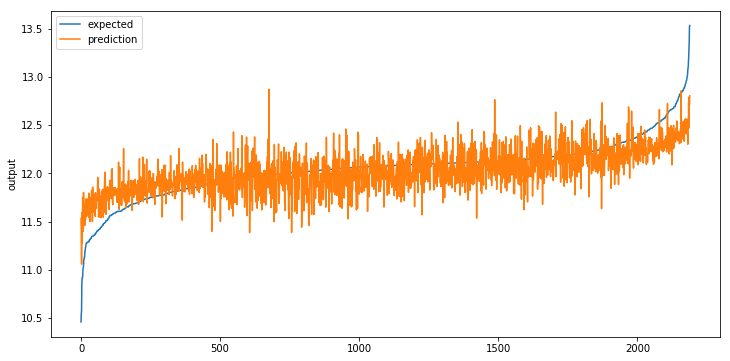

Score (RMSE): 0.2235001875732266
Score (R2): 0.439915503660806


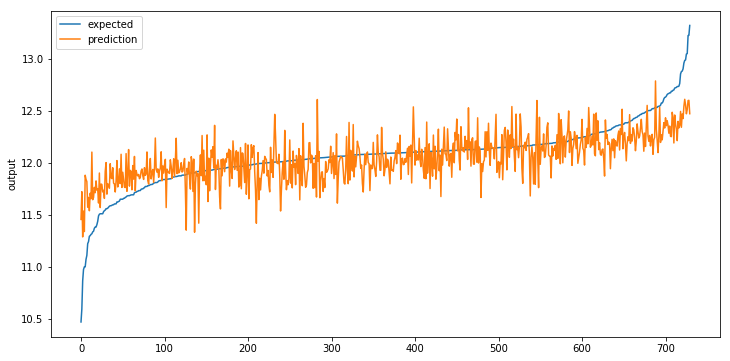

In [384]:
pred_mlp_1_tr, pred_mlp_1_val = rerun_single_mlp(best_mlp_1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_462 (Dense)            (None, 187)               54043     
_________________________________________________________________
dense_463 (Dense)            (None, 187)               35156     
_________________________________________________________________
dense_464 (Dense)            (None, 1)                 188       
Total params: 89,387
Trainable params: 89,387
Non-trainable params: 0
_________________________________________________________________
Score (RMSE): 0.20019885282330635
Score (R2): 0.5194166523500865


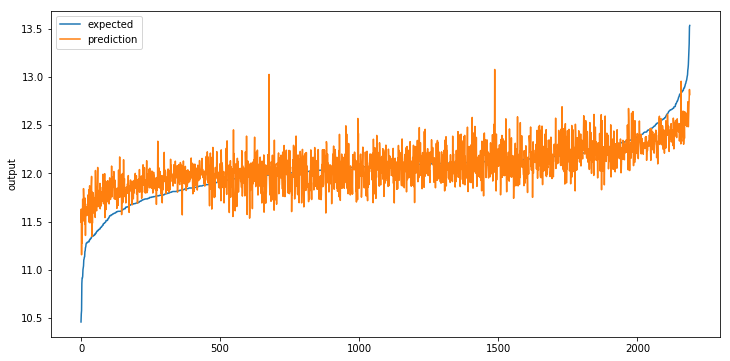

Score (RMSE): 0.22290326737584434
Score (R2): 0.4429032353150474


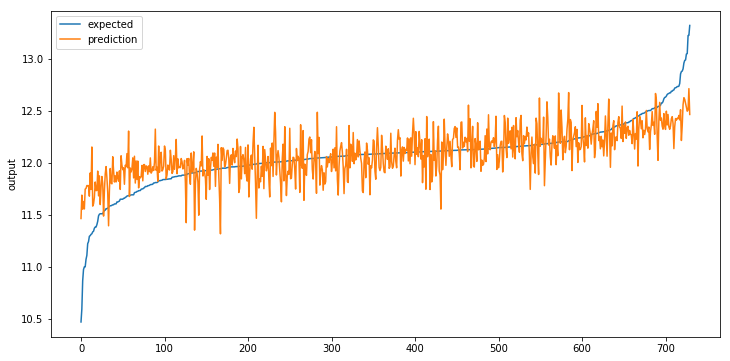

In [385]:
pred_mlp_2_tr, pred_mlp_2_val = rerun_single_mlp(best_mlp_2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_529 (Dense)            (None, 107)               30923     
_________________________________________________________________
dense_530 (Dense)            (None, 107)               11556     
_________________________________________________________________
dense_531 (Dense)            (None, 107)               11556     
_________________________________________________________________
dense_532 (Dense)            (None, 1)                 108       
Total params: 54,143
Trainable params: 54,143
Non-trainable params: 0
_________________________________________________________________
Score (RMSE): 0.20741196976857282
Score (R2): 0.4841621791783228


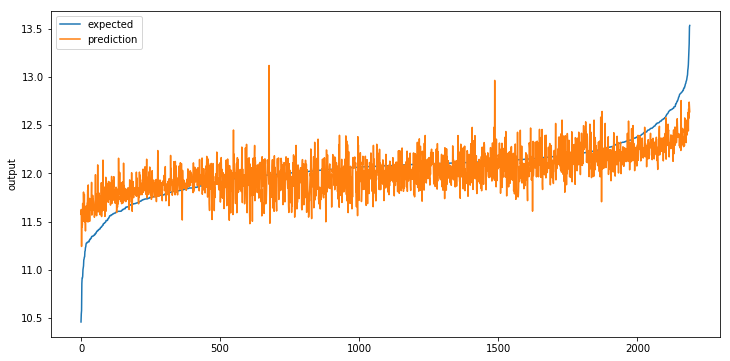

Score (RMSE): 0.2198829307860229
Score (R2): 0.4578982600492797


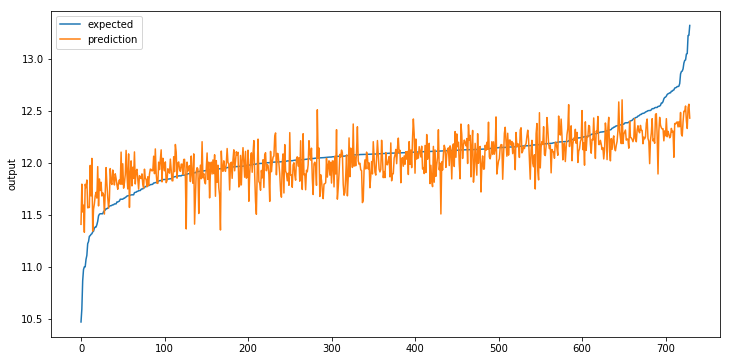

In [386]:
pred_mlp_3_tr, pred_mlp_3_val = rerun_single_mlp(best_mlp_3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1132 (Dense)           (None, 177)               51153     
_________________________________________________________________
dense_1133 (Dense)           (None, 79)                14062     
_________________________________________________________________
dense_1134 (Dense)           (None, 1)                 80        
Total params: 65,295
Trainable params: 65,295
Non-trainable params: 0
_________________________________________________________________
Score (RMSE): 0.2030178968365216
Score (R2): 0.5057869626026287


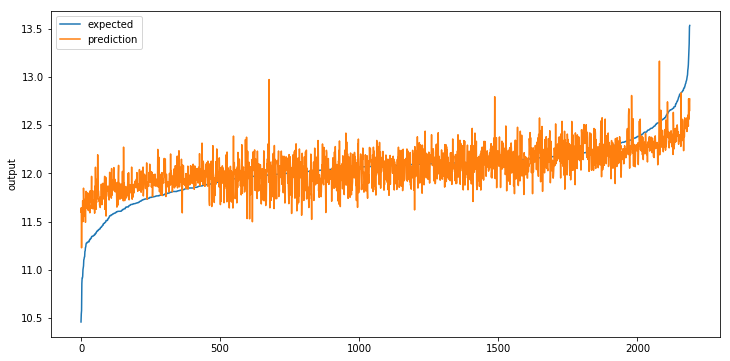

Score (RMSE): 0.22116817363633012
Score (R2): 0.45154243582703646


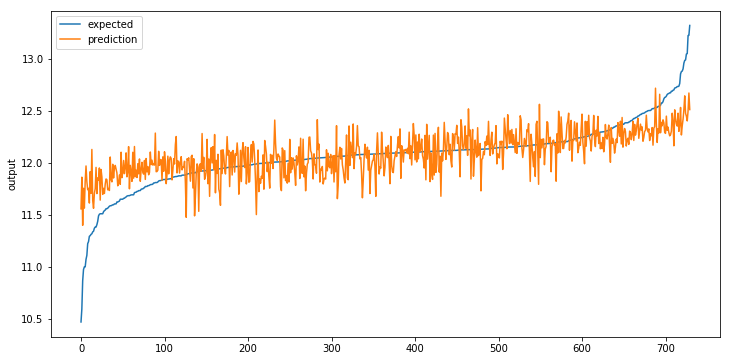

In [387]:
pred_mlp_4_tr, pred_mlp_4_val = rerun_single_mlp(best_mlp_4)

## GRNN

In [388]:
from neupy import algorithms, estimators, environment
from neupy import storage
from neupy.algorithms import GRNN as grnn

In [389]:
def run_single_grnnet(std):
    grnnet = algorithms.GRNN(std=std, verbose=True)
    grnnet.train(X_tr, y_tr)
    pred_grnn_tr = grnnet.predict(X_tr)
    prediction_report(pred_grnn_tr[:,0], X_tr, y_tr)
    pred_grnn_val = grnnet.predict(X_val)
    prediction_report(pred_grnn_val[:,0], X_val, y_val)
    
    return pred_grnn_tr, pred_grnn_val

** Load Models **


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 5.1

Score (RMSE): 0.19121351814453078
Score (R2): 0.5615876965774635


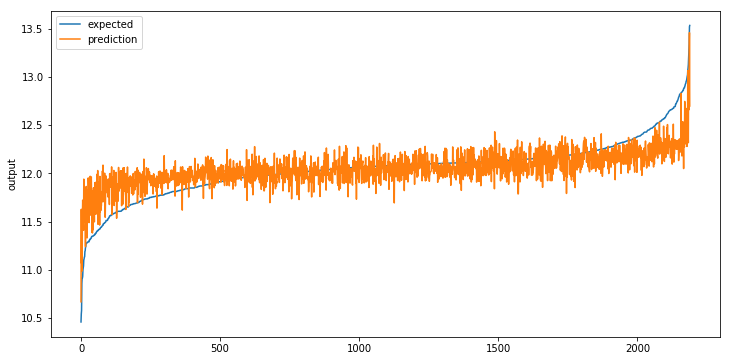

Score (RMSE): 0.2462800888807021
Score (R2): 0.31992568842688884


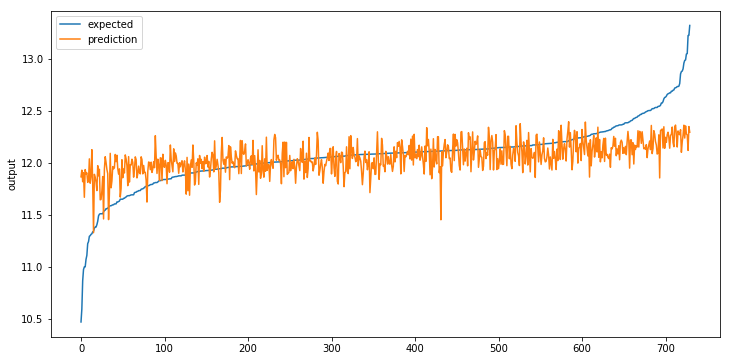

In [390]:
pred_grnn_tr, pred_grnn_val = run_single_grnnet(5.1)

## Ensemble

** Declarations **

In [391]:
def combine_results_all():
    df_mlp_1_tr = pd.DataFrame({'mlp_1': pred_mlp_1_tr[:,0]})
    df_mlp_2_tr = pd.DataFrame({'mlp_2': pred_mlp_2_tr[:,0]})
    df_mlp_3_tr = pd.DataFrame({'mlp_3': pred_mlp_3_tr[:,0]})
    df_mlp_4_tr = pd.DataFrame({'mlp_4': pred_mlp_4_tr[:,0]})
    df_grnn_tr = pd.DataFrame({'grnn': pred_grnn_tr[:,0]})
    df_tr=pd.concat([df_mlp_1_tr, df_mlp_2_tr, df_mlp_3_tr, df_mlp_4_tr, df_grnn_tr], axis=1)
    df_tr.describe()
    
    df_mlp_1_val = pd.DataFrame({'mlp_1': pred_mlp_1_val[:,0]})
    df_mlp_2_val = pd.DataFrame({'mlp_2': pred_mlp_2_val[:,0]})
    df_mlp_3_val = pd.DataFrame({'mlp_3': pred_mlp_3_val[:,0]})
    df_mlp_4_val = pd.DataFrame({'mlp_4': pred_mlp_4_val[:,0]})
    df_grnn_val = pd.DataFrame({'grnn': pred_grnn_val[:,0]})
    df_val=pd.concat([df_mlp_1_val, df_mlp_2_val, df_mlp_3_val, df_mlp_4_val, df_grnn_val], axis=1)
    df_val.describe()
    return df_tr, df_val

In [392]:
def combine_results_mlp():
    df_mlp_1_tr = pd.DataFrame({'mlp_1': pred_mlp_1_tr[:,0]})
    df_mlp_2_tr = pd.DataFrame({'mlp_2': pred_mlp_2_tr[:,0]})
    df_mlp_3_tr = pd.DataFrame({'mlp_3': pred_mlp_3_tr[:,0]})
    df_mlp_4_tr = pd.DataFrame({'mlp_4': pred_mlp_4_tr[:,0]})
    df_tr=pd.concat([df_mlp_1_tr, df_mlp_2_tr, df_mlp_3_tr, df_mlp_4_tr], axis=1)
    df_tr.describe()
    
    df_mlp_1_val = pd.DataFrame({'mlp_1': pred_mlp_1_val[:,0]})
    df_mlp_2_val = pd.DataFrame({'mlp_2': pred_mlp_2_val[:,0]})
    df_mlp_3_val = pd.DataFrame({'mlp_3': pred_mlp_3_val[:,0]})
    df_mlp_4_val = pd.DataFrame({'mlp_4': pred_mlp_4_val[:,0]})
    df_val=pd.concat([df_mlp_1_val, df_mlp_2_val, df_mlp_3_val, df_mlp_4_val], axis=1)
    df_val.describe()
    return df_tr, df_val

In [393]:
def ensemble_mean(preds_tr, preds_val):
    pred_mean_tr = np.array(preds_tr.mean(1))
    pred_mean_val = np.array(preds_val.mean(1))
    return pred_mean_tr, pred_mean_val

In [394]:
def ensemble_median(preds_tr, preds_val):
    pred_median_tr = np.array(preds_tr.median(1))
    pred_median_val = np.array(preds_val.median(1))
    return pred_median_tr, pred_median_val

In [395]:
def ensemble_perf_table(pred_mean_tr, pred_mean_val, pred_median_tr, pred_median_val):
    df_perf = pd.DataFrame(columns=['regressor','rmse_tr','r2_tr','rmse_val','r2_val'])
    df = get_score_desc(pred_mlp_1_tr[:,0], pred_mlp_1_val[:,0], 'MLPR(X)')
    df_perf = df_perf.append(df, ignore_index=True)
    df = get_score_desc(pred_mlp_2_tr[:,0], pred_mlp_2_val[:,0], 'MLPR(X,79)')
    df_perf = df_perf.append(df, ignore_index=True)
    df = get_score_desc(pred_mlp_3_tr[:,0], pred_mlp_3_val[:,0], 'MLPR(X,X)')
    df_perf = df_perf.append(df, ignore_index=True)
    df = get_score_desc(pred_mlp_4_tr[:,0], pred_mlp_4_val[:,0], 'MLPR(X,X,X)')
    df_perf = df_perf.append(df, ignore_index=True)
    df = get_score_desc(pred_grnn_tr[:,0], pred_grnn_val[:,0], 'GRNN')
    df_perf = df_perf.append(df, ignore_index=True)

    df = get_score_desc(pred_mean_tr, pred_mean_val, 'Ensemble_mean')
    df_perf = df_perf.append(df, ignore_index=True)
    df = get_score_desc(pred_median_tr, pred_median_val, 'Ensemble_median')
    df_perf = df_perf.append(df, ignore_index=True)

    return df_perf

In [396]:
def ensemble_pred_plot(pred_tr, pred_val):
    prediction_report(pred_tr, X_tr, y_tr)
    prediction_report(pred_val, X_val, y_val)

** Flow(All) **

In [397]:
df_tr, df_val = combine_results_all()
pred_mean_tr, pred_mean_val = ensemble_mean(df_tr, df_val)
pred_median_tr, pred_median_val = ensemble_median(df_tr, df_val)
perf_table_all = ensemble_perf_table(pred_mean_tr, pred_mean_val, pred_median_tr, pred_median_val)

In [398]:
perf_table_all

,regressor,rmse_tr,r2_tr,rmse_val,r2_val
0,MLPR(X),0.207920,0.481631,0.223500,0.439916
1,"MLPR(X,79)",0.200199,0.519417,0.222903,0.442903
2,"MLPR(X,X)",0.207412,0.484162,0.219883,0.457898
3,"MLPR(X,X,X)",0.203018,0.505787,0.221168,0.451542
4,GRNN,0.191214,0.561588,0.246280,0.319926
5,Ensemble_mean,0.190014,0.567071,0.214137,0.485861
6,Ensemble_median,0.193694,0.550141,0.213813,0.487415


Score (RMSE): 0.19001401395636613
Score (R2): 0.5670708648678295


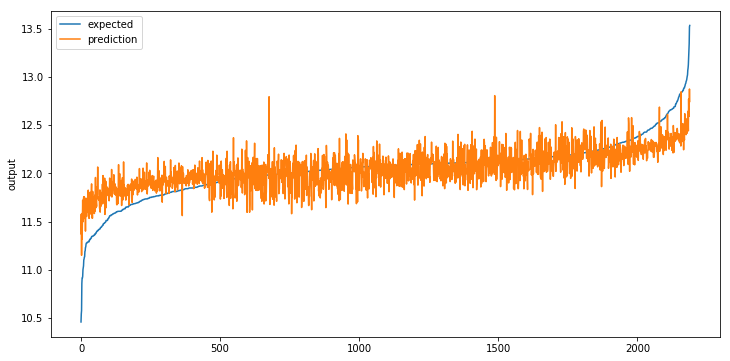

Score (RMSE): 0.21413678521212162
Score (R2): 0.48586126566990007


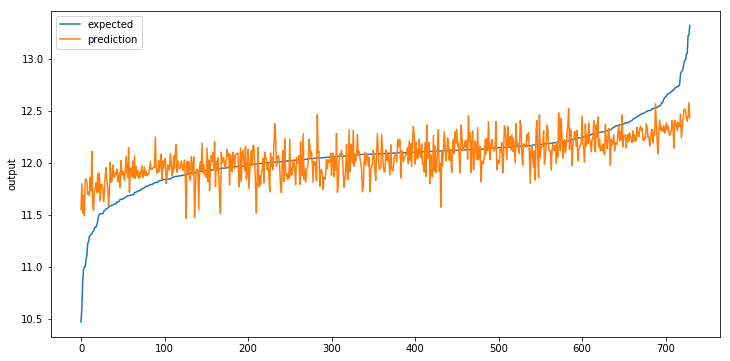

In [399]:
ensemble_pred_plot(pred_mean_tr, pred_mean_val)

Score (RMSE): 0.19369368952101787
Score (R2): 0.5501409179527779


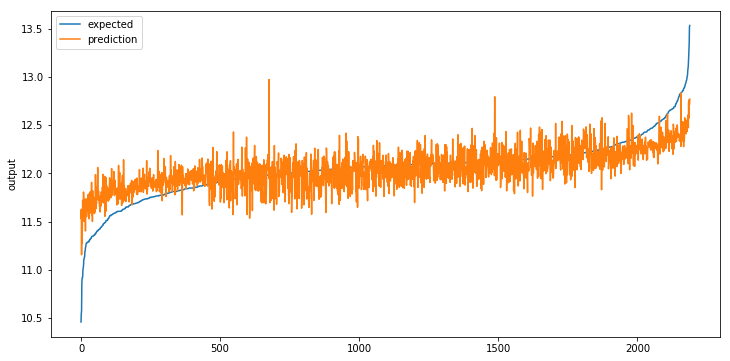

Score (RMSE): 0.21381298648270122
Score (R2): 0.4874149604495831


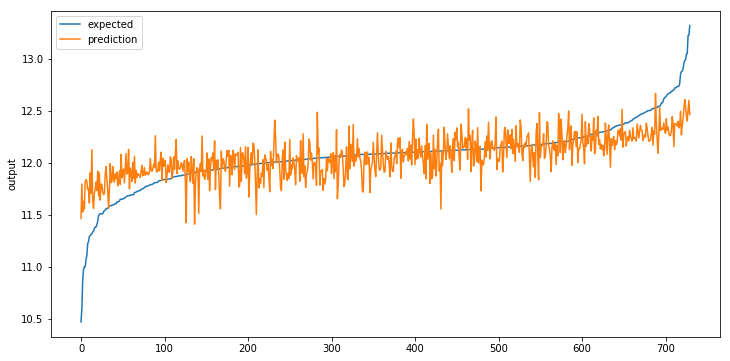

In [400]:
ensemble_pred_plot(pred_median_tr, pred_median_val)

** Flow(MLP) **

In [401]:
df_tr, df_val = combine_results_mlp()
pred_mean_tr, pred_mean_val = ensemble_mean(df_tr, df_val)
pred_median_tr, pred_median_val = ensemble_median(df_tr, df_val)
perf_table_mlp = ensemble_perf_table(pred_mean_tr, pred_mean_val, pred_median_tr, pred_median_val)

In [402]:
perf_table_mlp

,regressor,rmse_tr,r2_tr,rmse_val,r2_val
0,MLPR(X),0.207920,0.481631,0.223500,0.439916
1,"MLPR(X,79)",0.200199,0.519417,0.222903,0.442903
2,"MLPR(X,X)",0.207412,0.484162,0.219883,0.457898
3,"MLPR(X,X,X)",0.203018,0.505787,0.221168,0.451542
4,GRNN,0.191214,0.561588,0.246280,0.319926
5,Ensemble_mean,0.196911,0.535074,0.213792,0.487516
6,Ensemble_median,0.197404,0.532742,0.213870,0.487140


Score (RMSE): 0.19691067569534576
Score (R2): 0.5350737428283


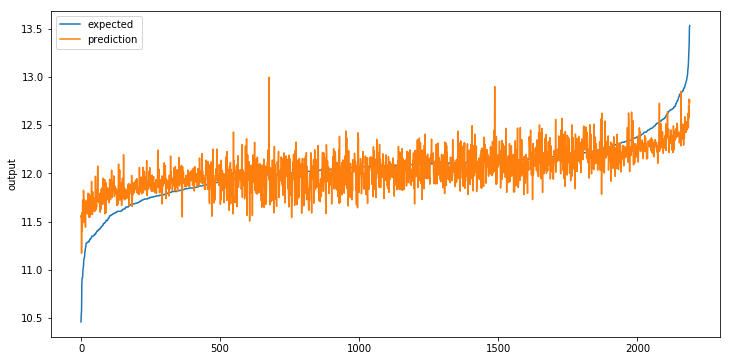

Score (RMSE): 0.2137919162152967
Score (R2): 0.48751598117679795


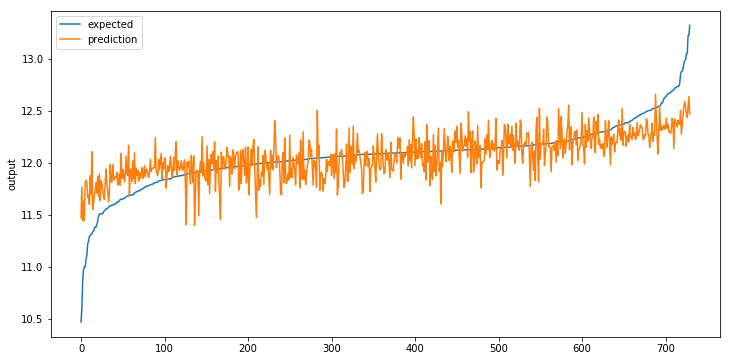

In [403]:
ensemble_pred_plot(pred_mean_tr, pred_mean_val)

Score (RMSE): 0.1974038691723371
Score (R2): 0.5327418656606897


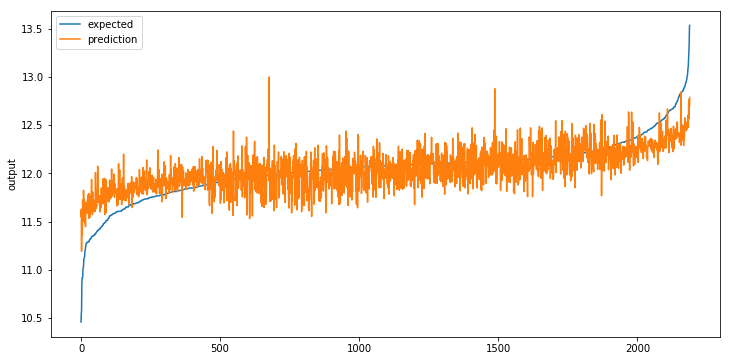

Score (RMSE): 0.21387028056253882
Score (R2): 0.48714021546378183


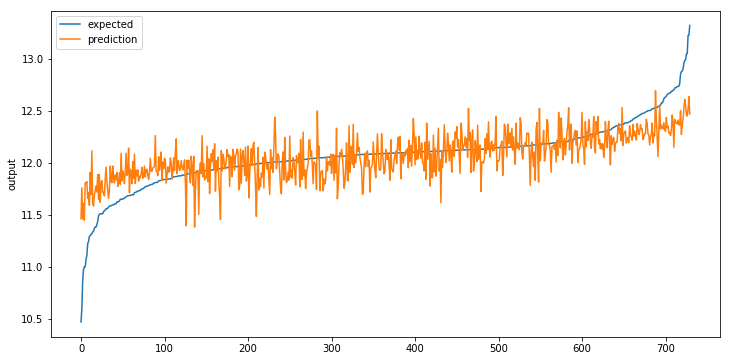

In [404]:
ensemble_pred_plot(pred_median_tr, pred_median_val)